## Практическая работа № 3 
### Вариант 1 

**Текст варианта**

Применение байесовской сети для обнаружения случаев финансового мошенничества с кредитными картами. В ходе истории работы финансового учреждения накоплена следующая информация, касающаяся мошенничества.

• Когда владелец карты выезжает за границу, мошеннические операции более вероятны, поскольку туристы являются частыми мишенями для воров – когда владелец карты
путешествует, 1% транзакций являются мошенническими, но только 0,4% транзакций являются мошенническими, когда он не путешествует. В среднем, во время путешествия
происходят 5% от всех транзакций владельца карты. Замечено также, что в случае мошеннических транзакций увеличивается вероятность покупки за границей, если только
владелец карты не находится в путешествии – когда владелец карты не путешествует, 10% мошеннических транзакций составляют покупки за границей, тогда как только 1% из законных сделок являются покупками за рубежом. С другой стороны, когда владелец карты путешествует, тогда 90% сделок — это зарубежные покупки вне зависимости от
легитимности сделок.

• Покупки, сделанные через Интернет, с большей вероятностью могут оказаться мошенническими. Особенно это актуально для держателей карт, у которых нет
компьютера. В настоящее время 80% населения владеет компьютером и для этих держателей карт, 1% их законных транзакций совершается через Интернет, однако этот
процент увеличивается до 2% в случае мошеннических операций. Для тех, у кого нет компьютера, всего 0,1% от их транзакций осуществляются через Интернет, но это число
увеличивается до 1,1% для мошеннических транзакций. К сожалению, компания-эмитент кредитной карты не знает, есть ли у держателя карты компьютер, однако она может делать
предположения об этом, проверяя, связана ли какая-либо из недавних транзакций с покупкой компьютерных товаров. По данным компании, в любую неделю 8% владельцев компьютеров покупают с помощью кредитной карты как минимум один предмет, связанный с компьютером, но так поступает лишь 0,1% тех, у кого компьютера нет.

**Задание**

1. Составьте байесовскую сеть по имеющейся информации. Ваша сеть должна содержать ровно 6 вершин, соответствующих следующим переменным: OC
(держатель карты владеет компьютером), Fraud (транзакция является мошеннической), Trav (держатель карты путешествует за границей), FP (текущая
транзакция является покупкой за рубежом), IP (текущая транзакция является покупкой через Интернет), CRP (за последнюю неделю была совершена покупка
компьютерных аксессуаров).

2. Оцените вероятности, того, что:
     a. некоторая, случайным образом выбранная, транзакция является мошеннической;

     b. мошеннической является транзакция, совершенная через Интернет пользователем, который за прошедшую неделю покупал компьютерные аксессуары;

     c. мошеннической является транзакция, осуществленная путешествующим держателем карты за границей; 

     d. мошеннической является транзакция, осуществленная за границей через Интернет не путешествующим держателем карты, который не покупал компьютерные товары за прошедшую неделю.

     e. держатель карты путешествует, если он совершил покупку за рубежом.

### 1. Создадим байсовской сети 
С помощью Bayers Server создадим байсовскую сеть по заданому варианту.
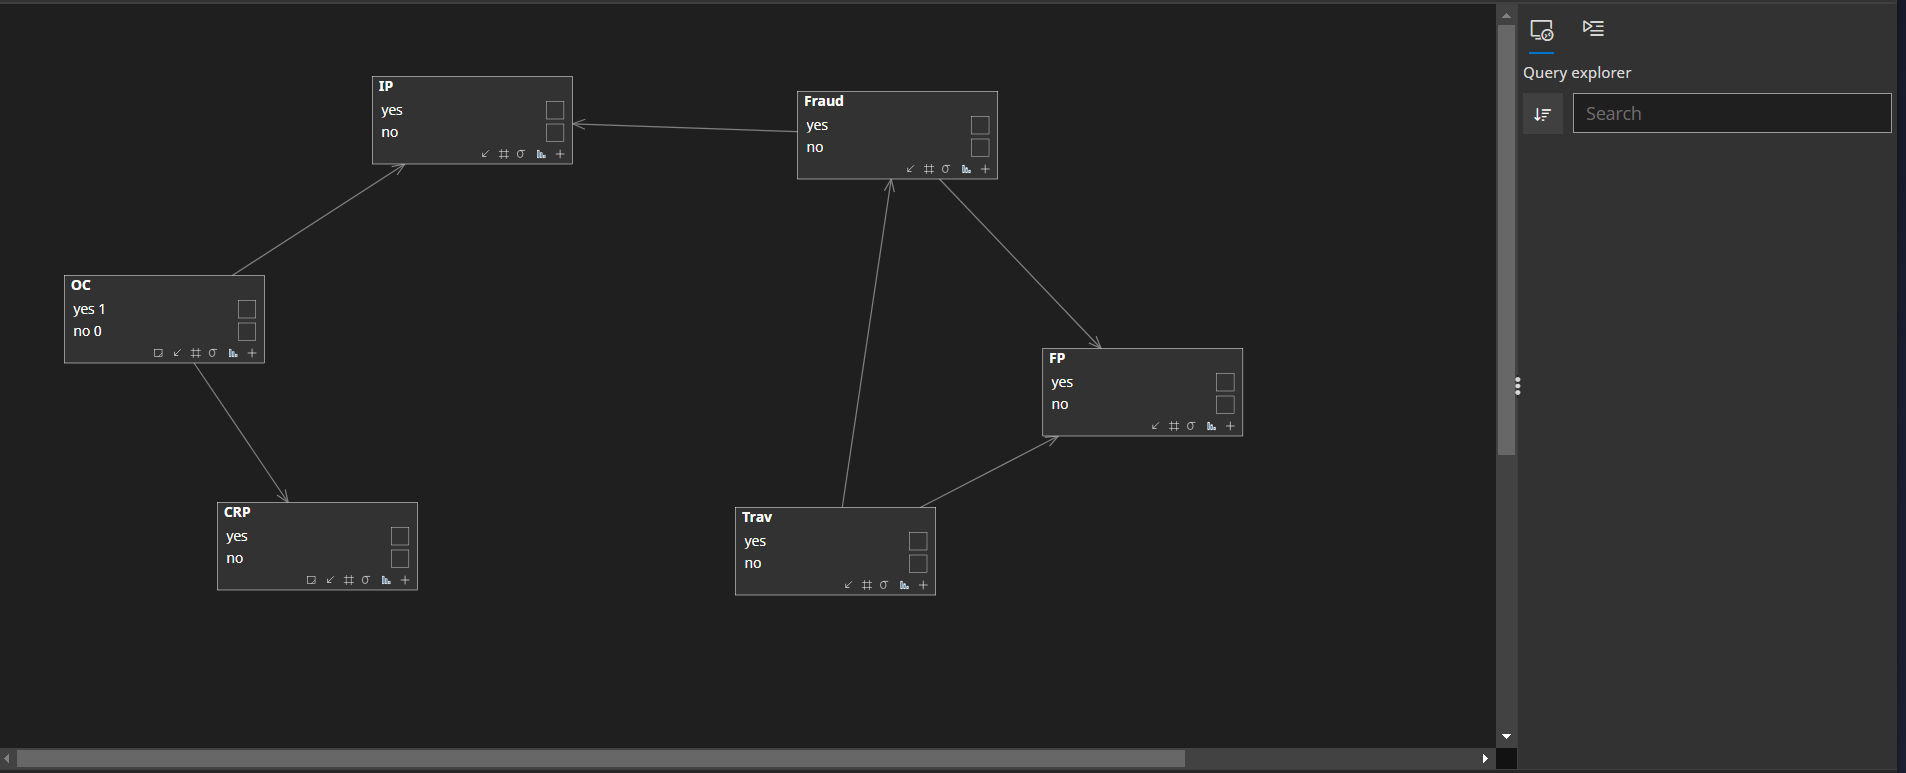   

### 2. Ответим на поставленные вопросы 

a. некоторая, случайным образом выбранная, транзакция является мошеннической

 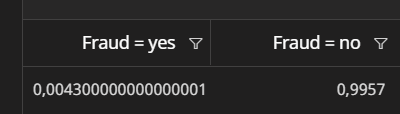

 Ответ: 0,0043

b. мошеннической является транзакция, совершенная через Интернет пользователем, который за прошедшую неделю покупал компьютерные аксессуары

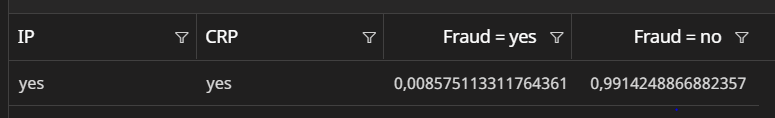

Ответ: 0,00858

c.  мошеннической является транзакция, осуществленная путешествующим держателем карты за границей

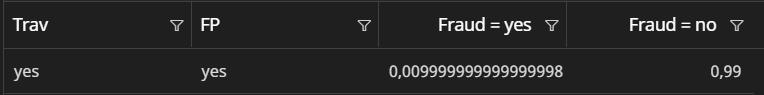

Ответ: 0,001

d. мошеннической является транзакция, осуществленная за границей через Интернет не путешествующим держателем карты, который не покупал компьютерные товары за прошедшую неделю

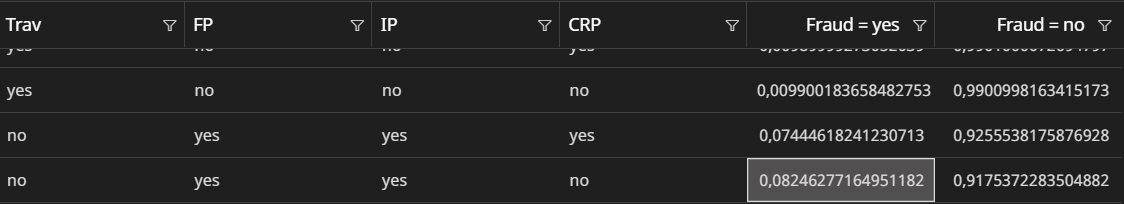

Ответ: 0,0825

e. держатель карты путешествует, если он совершил покупку за рубежом

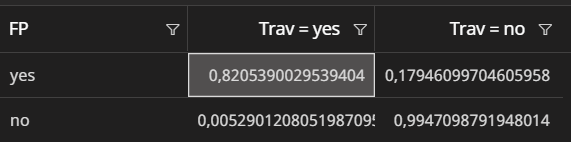

Ответ: 0,8205


### 3. Знакомство с возможностями библиотеки Gymnasium

In [1]:
import gymnasium as gym
import math
import random
import time

In [2]:
from continuous_cartpole import ContinuousCartPoleEnv

### Демонстрация имитатора

Одной из очень удобных особенностей Gymnasium является поддержка разных режимов отображения моделируемой системы. В частности, это позволяет визуально оценить поведение системы при том или ином управлении, используя наглядную анимацию. Выбор режима отображения осуществляется с помощью параметра render_mode конструктора (для отображения анимации следует передать значение 'human' - впрочем, нужно иметь в виду, что анимированная визуализация не обязательна, окружения могут и не поддерживать ее).

In [3]:
env = ContinuousCartPoleEnv(render_mode='human')

Отобразим динамику поведения стержня при отсутствии управления. Взаимодействие с моделью системы (окружением) организовано по шагам - на каждом шаге (функция step) необходимо передать управление. Функция возвращает кортеж значений, среди которых признак остановки. Эпизод моделирования стержня заканчивается, когда он отклоняется более чем на 20 градусов от вертикали. Отсутствие управления означает передачу нулевого воздействия на каждом шаге:

In [4]:
observation, info = env.reset()

for _ in range(1000):
    observation, reward, terminated, truncated, info = env.step((0.0,))

    if terminated or truncated:
        break

env.close()

c:\Python310\lib\site-packages\gymnasium\spaces\box.py:240: UserWarning: WARN: Casting input x to numpy array.
  gym.logger.warn("Casting input x to numpy array.")


### Несколько простых агентов
Реализуем несколько простых агентов и функцию оценки (метрику), по которой будем сравнивать эффективность алгоритмов управления. В качестве такой функции оценки удобно использовать количество падений стержня за определенное, достаточно большое, количество шагов или статистические характеристики отклонения стержня от вертикали.

In [5]:
class NoOpAgent:

    def get_action(self, obs):
        return (0.0, )

class RandomAgent:

    def get_action(self, obs):
        return (random.random() * 2 - 1, )

def to_grad(x : float) -> float:
    return x * 180 / math.pi

def run(env, agent, n=10000):
    """Запускает имитацию заданного агента в заданном окружении.

    Имитация продолжается в `n` шагов. При падении стержня - перезапускается.
    Результатом работы является количество падений и временной ряд абсолютных
    отклонений стержня от вертикали (в градусах)."""

    fell = 0
    angles = []
    
    observation, info = env.reset()
    angles.append(to_grad(abs(observation[2])))
    
    for _ in range(n):
        action = agent.get_action(observation) # env.action_space.sample()  # agent policy that uses the observation and info
        observation, reward, terminated, truncated, info = env.step(action)
        angles.append(to_grad(abs(observation[2])))
    
        if terminated or truncated:
            observation, info = env.reset()
            fell += 1

    return fell, angles

In [6]:
for agent_name, agent in [('NoOp agent', NoOpAgent()),
                          ('Random agent', RandomAgent())]:
    env = ContinuousCartPoleEnv()
    n_fell, angles = run(env, agent, 10000)
    env.close()
    print(f'{agent_name}: {n_fell} падений')

NoOp agent: 215 падений
Random agent: 298 падений


### Управление на основе строгих правил
Было бы достаточно наивно ожидать от простейших агентов выше какого-то хорошего результата - в конце-концов, они никак не использовали информацию о текущем положении стержня. Более разумным "бейзлайном" будет агент, прикладывающий то или иное воздействие в зависимости от состояния стержня. Информация об этом состоянии содержится в первом элементе, возвращаемом функцией step (который присваивается в переменную observation в коде выше). Это состояние, в свою очередь, является вектором из 4 элементов:

позиция тележки [-4.8; 4.8];
скорость тележки (положительная, если она едет вправо, отрицательная, если влево);
угол наклона стержня, в радианах [-0.4 (-24°); 0.4 (24°)];
угловая скорость стержня.
Например, разумным подходом будет толкать тележку в ту сторону, в которую она отклонилась, если это отклонение достаточно велико.

In [7]:
class SimpleRuleBasedAgent:
    """Управление системой "тележка-стержень" на основе положения стержня.

    Если наклон стержня (в какую-либо сторону) превышает 5°, то толкнуть
    тележку в эту сторону с силой 0.2.
    """
    def __init__(self):
        self.threshold_grad = 5
        self.push_force = 0.2
    
    def get_action(self, obs):
        x, v_x, angle, v_angle = obs
        if abs(to_grad(angle)) > self.threshold_grad:
            if angle > 0: return (self.push_force, )
            else:         return (-self.push_force, )
        else:
            return (0.0, )

In [8]:
env = ContinuousCartPoleEnv()
agent = SimpleRuleBasedAgent()
n_fell, angles = run(env, agent, 10000)
env.close()
print('Rule-based agent', n_fell)

Rule-based agent 66


Видно, что количество падений за 10000 шагов стало гораздо меньше. Отобразим поведение системы при заданном управлении.

In [9]:
env = ContinuousCartPoleEnv(render_mode='human')
agent = SimpleRuleBasedAgent()
n_fell, angles = run(env, agent, 1000)
env.close()

Задание 1: Попробуйте настроить параметры SimpleRuleBasedAgent, чтобы снизить количество падений.

Изменим в исходной функции 

In [10]:
class SimpleRuleBasedAgent:
    """Управление системой "тележка-стержень" на основе положения стержня.
    
    Если наклон стержня (в какую-либо сторону) превышает threshold_grad, то толкнуть
    тележку в эту сторону с силой push_force.
    """
    def __init__(self, threshold_grad, push_force):
        self.threshold_grad = threshold_grad
        self.push_force = push_force
    
    def get_action(self, obs):
        x, v_x, angle, v_angle = obs
        if abs(to_grad(angle)) > self.threshold_grad:
            if angle > 0: 
                return (min(self.push_force, 1.0), )
            else:
                    return (max(-self.push_force, -1.0), )
        else:
            return (0.0, )

Теперь увеличим threshold_grad с 5 градусов до значения из промежутка 10-15. push_force также попробуем увеличить до 0.2 - 0.6

In [11]:
best_params = (0, 0)
best_score = float('inf')  

for threshold_grad in range(0, 11):  
    for push_force in range(0, 11):  
        agent = SimpleRuleBasedAgent(threshold_grad, push_force * 0.1)

        env = ContinuousCartPoleEnv()
        n_fell, angles = run(env, agent, 10000)
        env.close()

        if n_fell < best_score:  
            best_score = n_fell
            best_threshold_grad = threshold_grad
            best_push_force = push_force * 0.1

print(f"Лучшие параметры: ({best_threshold_grad}, {best_push_force})")
env = ContinuousCartPoleEnv(render_mode='human')
agent = SimpleRuleBasedAgent(best_threshold_grad, best_push_force)
n_fell, angles = run(env, agent, 10000)
env.close()
print('Rule-based agent', n_fell)


Лучшие параметры: (2, 0.1)
Rule-based agent 32


Как мы видим наш вариант уменьшил снизило количество падений до 32. 

### Нечёткий регулятор
Для реализации нечёткого регулятора воспользуемся библиотекой scikit-fuzzy, предоставляющий обширный набор средств для построения нечётких систем - различные типовые функции принадлежности, операции над нечёткими множествами, алгоритмы вывода и пр. В относительно свежих версиях этой библиотеки предусмотрено два уровня API - низкоуровневый, в котором буквально все можно (и приходится) контролировать программисту, и высокоуровневый (в пакете skfuzzy.control), которым мы и воспользуемся.

In [12]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Модель программирования нечётких регуляторов, предлагаемая skfuzzy.control, требует, чтобы все линвистические переменные были разделены на два подмножества - антецеденты (то, что будет использоваться в антецеденте правила, части ЕСЛИ) и консеквенты (то, что будет использоваться в консеквенте правил, части ТО).

В случае со стержнем переменные-антецеденты будут соответствовать наблюдаемым характеристикам системы, а переменная-консеквент - управляющему воздействию.

In [13]:
# Угол наклона стержня
angle = ctrl.Antecedent(np.arange(-30, 30, 0.1), 'angle')

angle['LLL'] = fuzz.trapmf(angle.universe, [-30, -30, -15, -10])
angle['LL']  = fuzz.trimf(angle.universe, [-15, -10, -5])
angle['L']   = fuzz.trimf(angle.universe, [-10, -5, 0])
angle['N']   = fuzz.trimf(angle.universe, [-5, 0, 5])
angle['R']   = fuzz.trimf(angle.universe, [0, 5, 10])
angle['RR']  = fuzz.trimf(angle.universe, [5, 10, 15])
angle['RRR'] = fuzz.trapmf(angle.universe, [10, 15, 30, 30])

c:\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


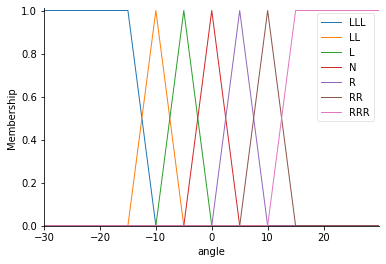

In [14]:
angle.view()

c:\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


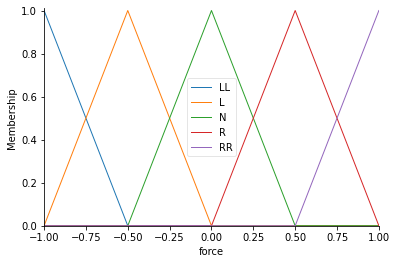

In [15]:
# Управляющее воздействие (сила, прикладываемая к тележке)
force = ctrl.Consequent(np.linspace(-1, 1, 21), 'force')
# Автоматическое создание нечётких множеств типовой формы
force.automf(5, names=['LL', 'L', 'N', 'R', 'RR'])
force.view()

Определим правила, по которым будет выбираться управляющее воздействие:

In [16]:
rule1 = ctrl.Rule(angle['LLL'] | angle['LL'], force['LL'])
rule2 = ctrl.Rule(angle['L'], force['L'])
rule3 = ctrl.Rule(angle['N'], force['N'])
rule4 = ctrl.Rule(angle['R'], force['R'])
rule5 = ctrl.Rule(angle['RRR'] | angle['RR'], force['RR'])

Наконец, соберем управляющий алгоритм, определяемый этим набором правил:

In [17]:
cartpole_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
cartpole_sim = ctrl.ControlSystemSimulation(cartpole_ctrl)

Проверим поведение регулятора на некоторых входных значениях:

In [18]:
# Задаем значения всех переменных-входов (переменных-антецедентов)
cartpole_sim.input['angle'] = -10.0
# Запускаем вывод
cartpole_sim.compute()
# Отображаем результат
cartpole_sim.output

OrderedDict([('force', -0.833333333333264)])

В целях отладки можно и визуализировать проведенный вывод:

-0.833333333333264


c:\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


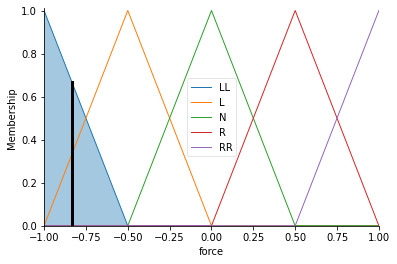

In [19]:
print(cartpole_sim.output['force'])
force.view(sim=cartpole_sim)

Еще очень интересно может быть визуализировать зависимость управляющего воздействия от наблюдаемых значений (это не всегда возможно из-за большой размерности входного пространства признаков, но в данной постановке - вполне).

In [20]:
import matplotlib.pyplot as plt

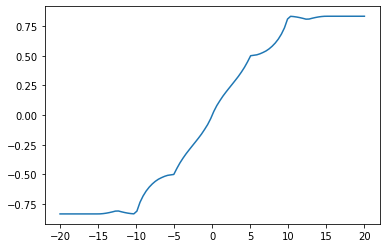

In [21]:
x = np.linspace(-20, 20, 100)
y = []
for c_x in x:
    cartpole_sim.input['angle'] = c_x
    cartpole_sim.compute()
    y.append(cartpole_sim.output['force'])
y = np.array(y)

plt.plot(x, y)

Задание 2. Закончите реализацию нечетко-логического агента для управления стержнем (см. код ниже). Оцените качество управления и визуализируйте поведение стержня под получившимся управляющим воздействием.

In [29]:
class FuzzyAgent:
    def __init__(self):

        self.angle = ctrl.Antecedent(np.arange(-30, 30, 0.1), 'angle')
        self.angle['LLL'] = fuzz.trapmf(self.angle.universe, [-30, -30, -15, -10])
        self.angle['LL']  = fuzz.trimf(self.angle.universe, [-15, -10, -5])
        self.angle['L']   = fuzz.trimf(self.angle.universe, [-10, -5, 0])
        self.angle['N']   = fuzz.trimf(self.angle.universe, [-5, 0, 5])
        self.angle['R']   = fuzz.trimf(self.angle.universe, [0, 5, 10])
        self.angle['RR']  = fuzz.trimf(self.angle.universe, [5, 10, 15])
        self.angle['RRR'] = fuzz.trapmf(self.angle.universe, [10, 15, 30, 30])
        
                
        # Управляющее воздействие (сила, прикладываемая к тележке)
        self.force = ctrl.Consequent(np.linspace(-1, 1, 21), 'force')
        
        
        # Автоматическое создание нечётких множеств типовой формы
        self.force.automf(5, names=['LL', 'L', 'N', 'R', 'RR'])
        
        
        # Правила, по которым будет выбираться управляющее воздействие
        rule1 = ctrl.Rule(self.angle['LLL'] | self.angle['LL'], self.force['LL'])
        rule2 = ctrl.Rule(self.angle['L'], self.force['L'])
        rule3 = ctrl.Rule(self.angle['N'], self.force['N'])
        rule4 = ctrl.Rule(self.angle['R'], self.force['R'])
        rule5 = ctrl.Rule(self.angle['RRR'] | self.angle['RR'], self.force['RR'])
        
        
        # Управляющий алгоритм, определяемый набором правил
        self.cartpole_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
        self.cartpole_sim = ctrl.ControlSystemSimulation(self.cartpole_ctrl)

    def get_action(self, obs):
        x, v_x, obs_angle, obs_v_angle = obs

        # Перевод угла из градусов в радианы
        obs_angle = to_grad(obs_angle)

        # Задаем значения входных переменных
        self.cartpole_sim.input['angle'] = obs_angle
        
        
        # Запускаем вывод
        self.cartpole_sim.compute()
        
        # Возврат значения управляющего воздействия
        force = self.cartpole_sim.output['force']
        return (force, )

In [30]:
env = ContinuousCartPoleEnv()
agent = FuzzyAgent()
n_fell, angles = run(env, agent, 10000)
env.close()
print('FuzzyAgent', n_fell)

c:\Python310\lib\site-packages\gymnasium\spaces\box.py:240: UserWarning: WARN: Casting input x to numpy array.
  gym.logger.warn("Casting input x to numpy array.")


FuzzyAgent 43


Задание 3. Усовершенствуйте систему правил, добавив к анализу угловую скорость стержня (и, возможно, по-другому определив переменные), чтобы количество падений за 10000 шагов не превышало 10.

Для усовершенствования систему добавим правила управляющего воздействия, а также добавим угловую скорость стержня и скорректируем границы подмножеств. 

In [31]:
class FuzzyAgent:
    def __init__(self):
        self.angle = ctrl.Antecedent(np.arange(-30, 30, 0.1), 'angle')
        self.angle['LLL'] = fuzz.trapmf(self.angle.universe, [-30, -30, -15, -10])
        self.angle['LL']  = fuzz.trimf(self.angle.universe, [-15, -10, -5])
        self.angle['L']   = fuzz.trimf(self.angle.universe, [-10, -5, 0])
        self.angle['N']   = fuzz.trimf(self.angle.universe, [-5, 0, 5])
        self.angle['R']   = fuzz.trimf(self.angle.universe, [0, 5, 10])
        self.angle['RR']  = fuzz.trimf(self.angle.universe, [5, 10, 15])
        self.angle['RRR'] = fuzz.trapmf(self.angle.universe, [10, 15, 30, 30])
        
        
        # Угловая скорость стержня
        self.v_angle = ctrl.Antecedent(np.arange(-1, 1, 0.01), 'v_angle')
        self.v_angle['LL'] = fuzz.trapmf(self.v_angle.universe, [-1, -1, -0.8, -0.6])
        self.v_angle['L']  = fuzz.trimf(self.v_angle.universe, [-0.7, -0.4, -0.1])
        self.v_angle['N']  = fuzz.trimf(self.v_angle.universe, [-0.2, 0, 0.2])
        self.v_angle['R']  = fuzz.trimf(self.v_angle.universe, [0.1, 0.4, 0.7])
        self.v_angle['RR'] = fuzz.trapmf(self.v_angle.universe, [0.6, 0.8, 1, 1])
        
                
        # Управляющее воздействие (сила, прикладываемая к тележке)
        self.force = ctrl.Consequent(np.linspace(-1, 1, 21), 'force')
        
        
        # Автоматическое создание нечётких множеств типовой формы
        self.force.automf(5, names=['LL', 'L', 'N', 'R', 'RR'])
        
              
        # Правила, по которым будет выбираться управляющее воздействие
        rule1 = ctrl.Rule(self.v_angle['LL'] | self.v_angle['L'], self.force['LL'])
        rule2 = ctrl.Rule(self.v_angle['RR'] | self.v_angle['R'], self.force['RR'])
        rule3 = ctrl.Rule(self.angle['LLL'] | self.angle['LL'], self.force['LL'])
        rule4 = ctrl.Rule(self.angle['L'], self.force['L'])
        rule5 = ctrl.Rule(self.angle['N'], self.force['N'])
        rule6 = ctrl.Rule(self.angle['R'], self.force['R'])
        rule7 = ctrl.Rule(self.angle['RRR'] | self.angle['RR'], self.force['RR'])
 

        # Управляющий алгоритм, определяемый набором правил
        self.cartpole_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
        self.cartpole_sim = ctrl.ControlSystemSimulation(self.cartpole_ctrl)

    def get_action(self, obs):
        x, v_x, obs_angle, obs_v_angle = obs

        # Перевод угла из градусов в радианы
        obs_angle = to_grad(obs_angle)
        obs_v_angle = to_grad(obs_v_angle)

        # Задайте значения антецедентов
        self.cartpole_sim.input['angle'] = obs_angle
        self.cartpole_sim.input['v_angle'] = obs_v_angle

        # Выполните вычисления
        self.cartpole_sim.compute()

        # Возвращайте значения
        force = self.cartpole_sim.output['force']
        return (force, )

In [32]:
env = ContinuousCartPoleEnv()
agent = FuzzyAgent()
n_fell, angles = run(env, agent, 10000)
env.close()
print('FuzzyAgent', n_fell)

c:\Python310\lib\site-packages\gymnasium\spaces\box.py:240: UserWarning: WARN: Casting input x to numpy array.
  gym.logger.warn("Casting input x to numpy array.")


FuzzyAgent 1


Видно, что количество падений за 10000 стало меньше 10.